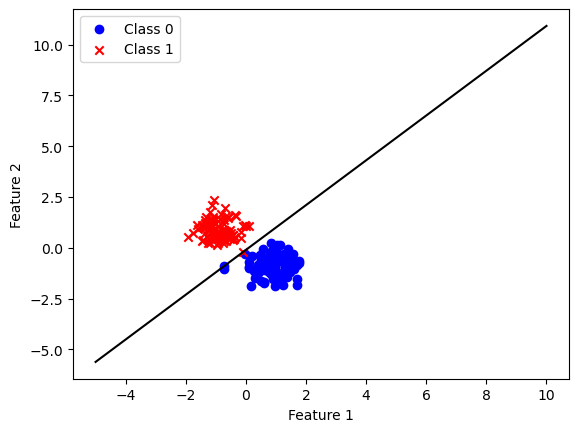

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [2, 2]
cov = [[1, 0], [0, 1]]
mean2 = [-2, 6]

data1 = np.random.multivariate_normal(mean1, cov, 100)
data2 = np.random.multivariate_normal(mean2, cov, 100)

# Combine the data and labels
data = np.concatenate((data1, data2))
labels = np.concatenate((-np.ones(100), np.ones(100)))

# Standardize the data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initialize
np.random.seed(2)
w = np.random.randn(2)
b = np.random.randn(1)
epochs = 10000
eta = 0.001  # Learning rate

for i in range(epochs):
    z = np.dot(w, data.T) + b  # Calculate the output
    phiZ = np.where(z > 0, 1, -1)  # Apply the activation function (threshold at 0)

    # Calculate the error
    error = np.mean(phiZ != (labels == 1))

    # Update the weights and bias
    w += eta * np.dot(data.T, (labels - phiZ))
    b += eta * np.sum(labels - phiZ)

    # Check for convergence
    if error == 0:
        break

# Create a scatter plot
plt.figure()
plt.scatter(data[:100, 0], data[:100, 1], color='blue', marker='o')
plt.scatter(data[100:, 0], data[100:, 1], color='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])

# Plot the decision boundary
x = np.linspace(-5, 10, 100)
yval = (-b - w[0] * x) / w[1]
plt.plot(x, yval, 'k')

plt.show()
